In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import model_selection, naive_bayes, svm
from sklearn.model_selection import permutation_test_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn import metrics
import seaborn as sns
import random
from pandas import plotting

In [4]:
random.seed(1)


In [5]:
Part_chro=['13','22','10', '18']
Part_reco=['19','20','02','09']

In [6]:
areas=['FC','FP','FO','FT','TO','TC','TP','PO','PC','CO','FF','CC','PP','TT','OO']

data=pd.read_pickle('data/NEW_wPLI_all_10_1_left_theta.pickle')

In [7]:
#chronic 0
data.insert(0, 'outcome', "0")


# %%
for p in Part_reco:
    data.iloc[np.where(data['ID'] == p)[0],0] = "1"
   

In [8]:
grouped_data=data.groupby('outcome')

plotting.scatter_matrix(data[areas],c=data['outcome'])
fig=plt.gcf()
plt.show()

In [9]:
data_Base=data[(data['Phase'] == 'Base')]
data_Anes=data[(data['Phase'] == 'Anes')]
data_Reco=data[(data['Phase'] == 'Reco')]

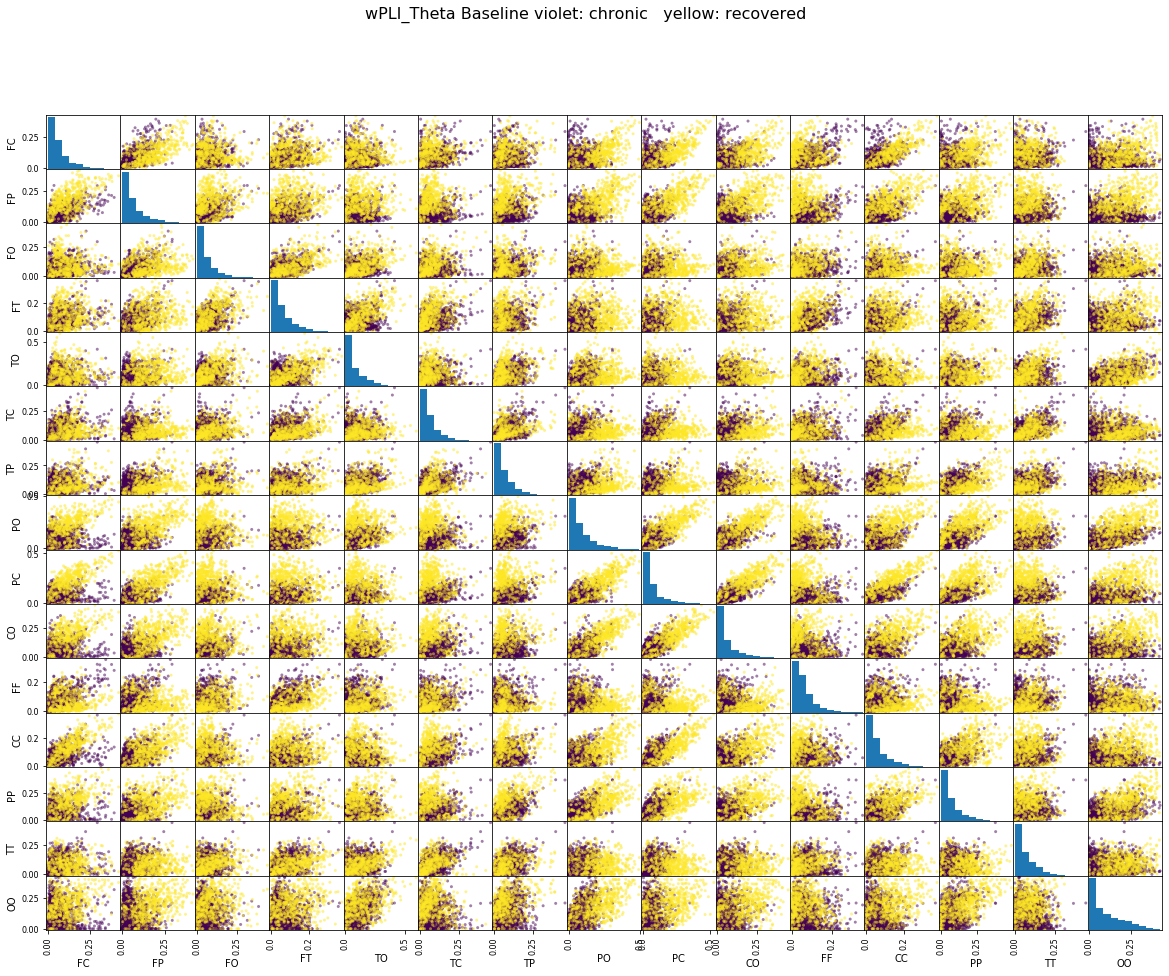

<Figure size 1440x1080 with 0 Axes>

In [10]:
plt.rcParams['figure.figsize'] = [20, 15]
plotting.scatter_matrix(data_Base[areas],c=(data_Base['outcome']=="1"))
fig=plt.gcf()
fig.suptitle('wPLI_Theta Baseline violet: chronic   yellow: recovered', fontsize=16)
plt.show()
plt.savefig('wPLI_Theta_scatter_Base.png',dpi=150)


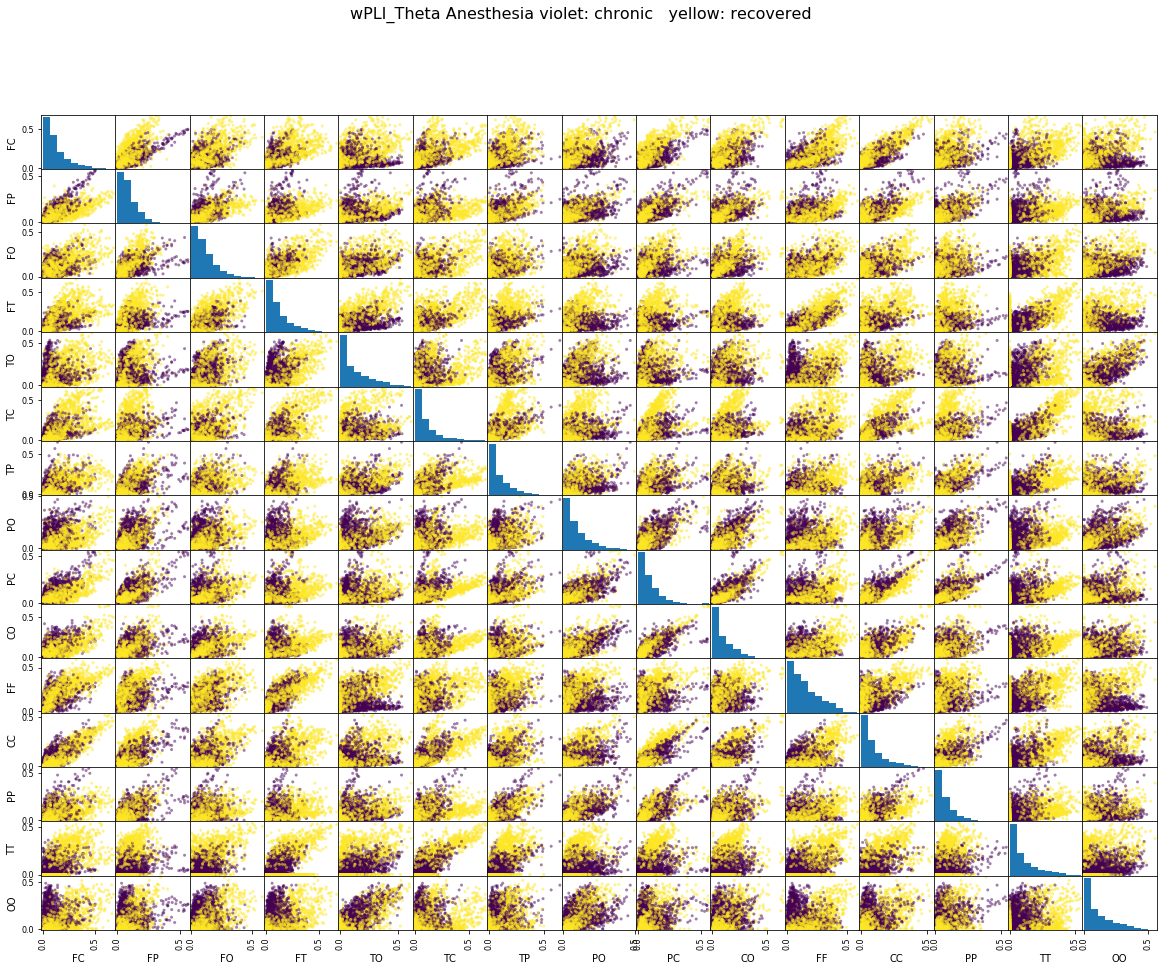

<Figure size 1440x1080 with 0 Axes>

In [11]:
plotting.scatter_matrix(data_Anes[areas],c=(data_Anes['outcome']=="1"))
fig=plt.gcf()
fig.suptitle('wPLI_Theta Anesthesia violet: chronic   yellow: recovered', fontsize=16)
plt.show()
plt.savefig('wPLI_Theta_scatter_Anes.png',dpi=150)

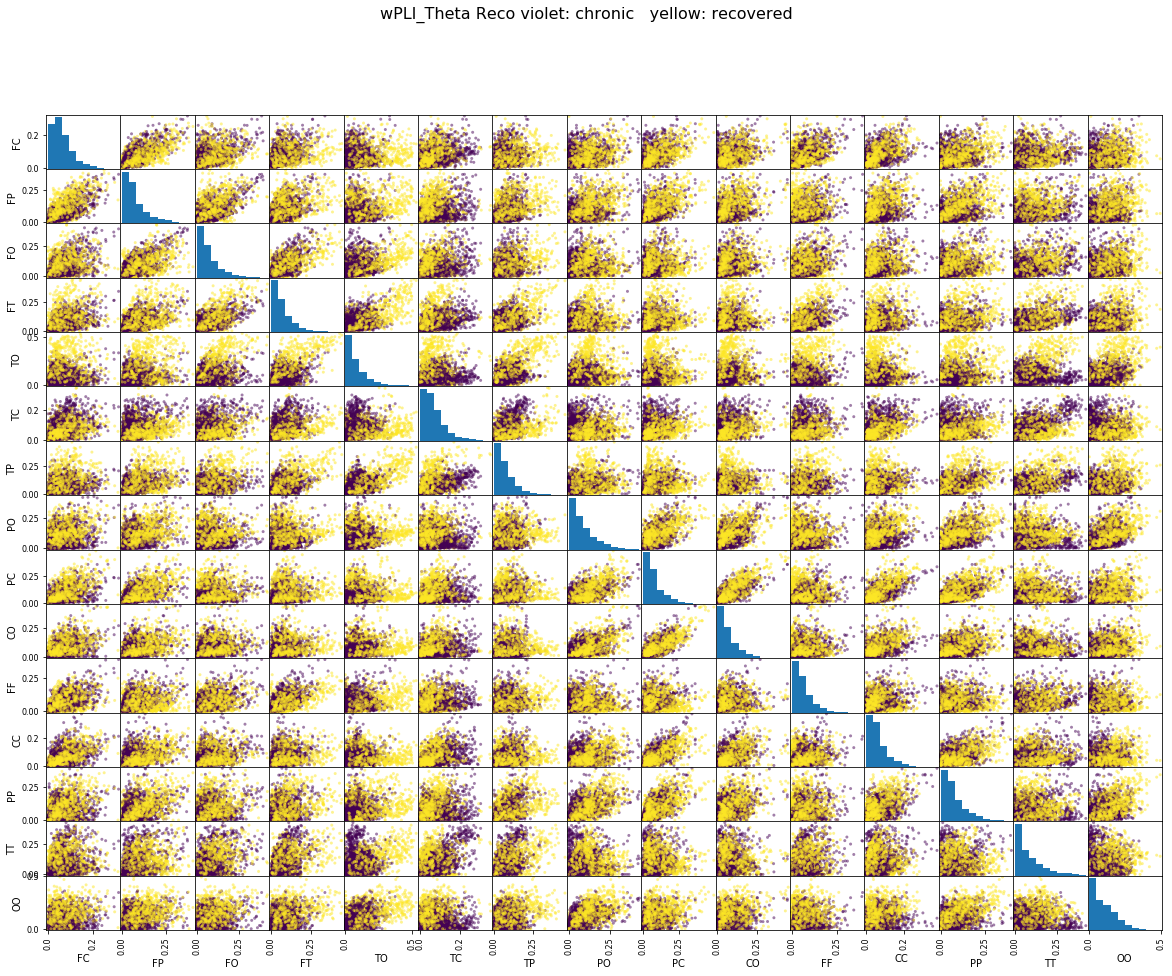

In [12]:
plotting.scatter_matrix(data_Reco[areas],c=(data_Reco['outcome']=="1"))
fig=plt.gcf()
fig.suptitle('wPLI_Theta Reco violet: chronic   yellow: recovered', fontsize=16)
plt.show()



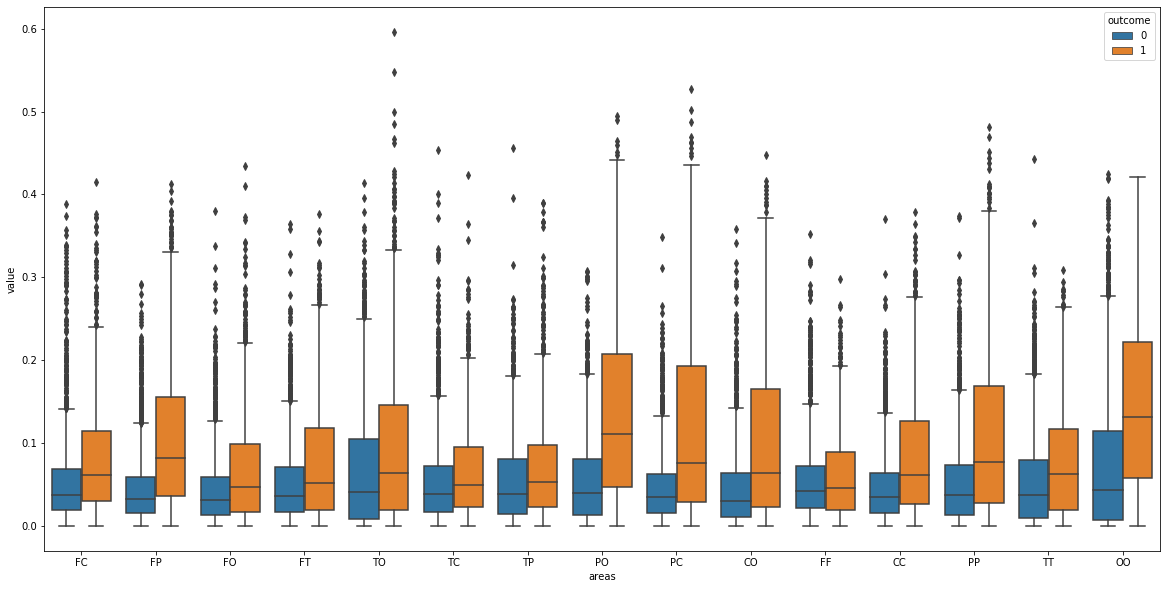

In [13]:
plt.rcParams['figure.figsize'] = [20, 10]
dd=pd.melt(data_Base,id_vars=['outcome'],value_vars=areas,var_name='areas')
sns.boxplot(x='areas',y='value',data=dd,hue='outcome')
plt.savefig('wPLI_Theta_box_Base.png',dpi=150)
#data_Base.groupby('outcome').boxplot(column=areas)


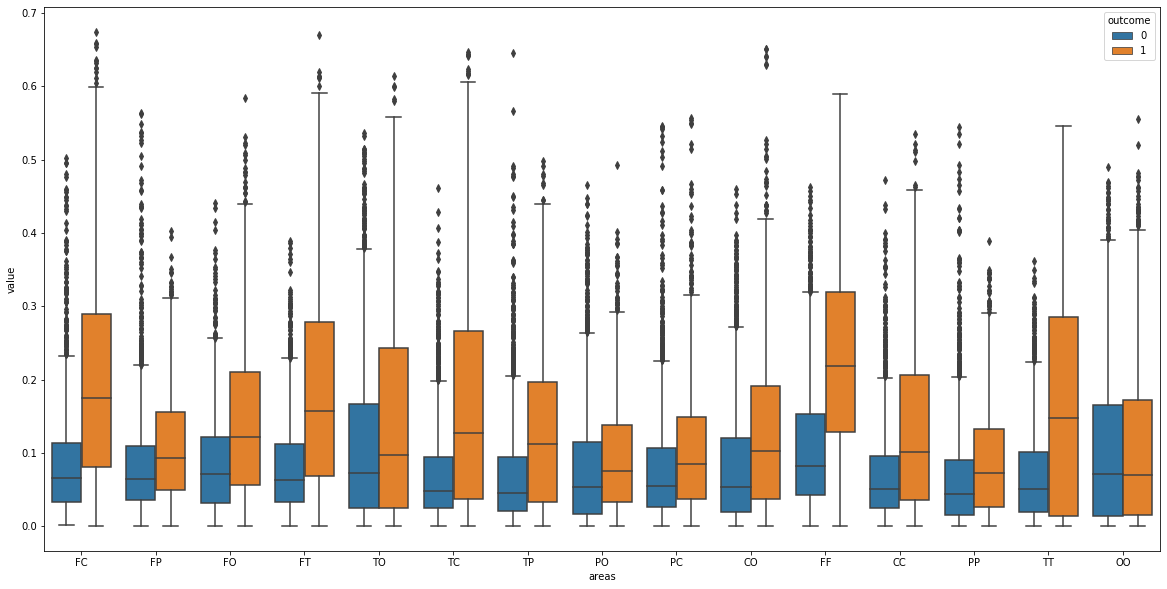

In [14]:
dd=pd.melt(data_Anes,id_vars=['outcome'],value_vars=areas,var_name='areas')
sns.boxplot(x='areas',y='value',data=dd,hue='outcome')
plt.savefig('wPLI_Theta_box_Anes.png',dpi=150)
#data_Anes.groupby('outcome').boxplot(column=areas)


In [15]:
#dd=pd.melt(data_Anes,id_vars=['ID'],value_vars='FF',var_name='areas')
#sns.boxplot(x='areas',y='value',data=dd,hue='ID')

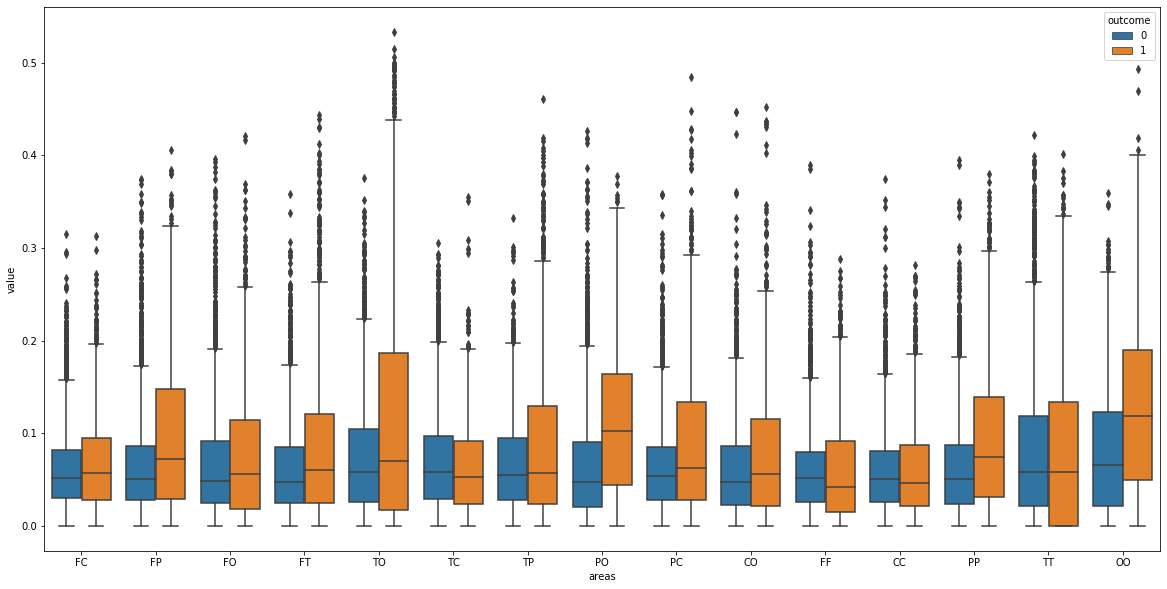

In [16]:
dd=pd.melt(data_Reco,id_vars=['outcome'],value_vars=areas,var_name='areas')
sns.boxplot(x='areas',y='value',data=dd,hue='outcome')
plt.savefig('wPLI_Theta_box_Reco.png',dpi=150)
#data_Reco.groupby('outcome').boxplot(column=areas)


In [17]:
data_Anes

outcome         Name  ID Phase   Time        FC        FP        FO  \
0         0  WSAS05_Anes  05  Anes    0.0  0.052640  0.049215  0.022448   
1         0  WSAS05_Anes  05  Anes    1.0  0.061030  0.043334  0.020893   
2         0  WSAS05_Anes  05  Anes    2.0  0.034934  0.048744  0.028603   
3         0  WSAS05_Anes  05  Anes    3.0  0.037603  0.018959  0.058690   
4         0  WSAS05_Anes  05  Anes    4.0  0.029320  0.053998  0.113619   
..      ...          ...  ..   ...    ...       ...       ...       ...   
286       1  WSAS02_Anes  02  Anes  286.0  0.188728  0.113770  0.084633   
287       1  WSAS02_Anes  02  Anes  287.0  0.167939  0.103181  0.083156   
288       1  WSAS02_Anes  02  Anes  288.0  0.205824  0.110909  0.077815   
289       1  WSAS02_Anes  02  Anes  289.0  0.255678  0.096312  0.075882   
290       1  WSAS02_Anes  02  Anes  290.0  0.224156  0.094206  0.099894   

           FT        TO        TC        TP        PO        PC        CO  \
0    0.022989  0.001195  0.037014  0.014763  0.051524  0.182780  0.124230   
1    0.021344  0.045473  0.047744  0.039681  0.054458  0.195359  0.125376   
2    0.022248  0.089605  0.016638  0.066425  0.129697  0.133253  0.056293   
3    0.037561  0.002296  0.019031  0.020349  0.032794  0.043778  0.000000   
4    0.044105  0.045592  0.037194  0.060277  0.069557  0.024336  0.003382   
..        ...       ...       ...       ...       ...       ...       ...   
286  0.343136  0.356150  0.011985  0.243842  0.102593  0.082504  0.151692   
287  0.388007  0.384241  0.018392  0.275744  0.128314  0.080145  0.144210   
288  0.361283  0.274140  0.026554  0.097135  0.089585  0.068061  0.105965   
289  0.355621  0.339204  0.172781  0.119120  0.136530  0.050893  0.149265   
290  0.333808  0.342996  0.189984  0.106400  0.117884  0.072021  0.140406   

           FF        CC        PP        TT        OO  
0    0.024694  0.111881  0.043953  0.008669  0.026825  
1    0.021248  0.130312  0.058359  0.027811  0.110984  
2    0.007331  0.065008  0.061000  0.056164  0.160908  
3    0.036750  0.022248  0.016652  0.059275  0.041768  
4    0.042637  0.029554  0.043647  0.108755  0.010710  
..        ...       ...       ...       ...       ...  
286  0.314371  0.053515  0.164956  0.072406  0.141700  
287  0.307273  0.031116  0.181429  0.000000  0.166171  
288  0.335825  0.049426  0.146057  0.000000  0.135661  
289  0.355632  0.193325  0.103165  0.000000  0.182548  
290  0.305401  0.170753  0.118174  0.000000  0.140484  

[3101 rows x 20 columns]

In [18]:
from scipy.stats import ttest_ind

p_diff_Anes=[]
cat1 = data_Anes[(data_Anes['ID'] == '13') | (data_Anes['ID'] == '22') | (data_Anes['ID'] == '10') | (data_Anes['ID'] == '18')]
cat2 = data_Anes[(data_Anes['ID'] == '19') | (data_Anes['ID'] == '20') | (data_Anes['ID'] == '02') | (data_Anes['ID'] == '09')]
#cat2 = data_Anes[data_Anes['outcome']==1]

for a in areas:
    p_diff_Anes.append([a,ttest_ind(cat1[a], cat2[a],equal_var=False)])
    

In [19]:
p_diff_Anes

[['FC',
  Ttest_indResult(statistic=-24.38661240676328, pvalue=3.5471587583361067e-113)],
 ['FP',
  Ttest_indResult(statistic=-8.806240981892241, pvalue=2.4793017308594906e-18)],
 ['FO',
  Ttest_indResult(statistic=-17.156413350447885, pvalue=2.8703628891995255e-61)],
 ['FT',
  Ttest_indResult(statistic=-24.775661549341436, pvalue=2.039883847648131e-114)],
 ['TO',
  Ttest_indResult(statistic=-2.9589547071606908, pvalue=0.0031187761110212904)],
 ['TC',
  Ttest_indResult(statistic=-20.45169072354358, pvalue=3.625718382032177e-82)],
 ['TP',
  Ttest_indResult(statistic=-13.797792540860211, pvalue=1.5312978815186533e-41)],
 ['PO',
  Ttest_indResult(statistic=-3.5026177666462015, pvalue=0.0004694072802714538)],
 ['PC',
  Ttest_indResult(statistic=-7.301926538543754, pvalue=3.896549710152883e-13)],
 ['CO',
  Ttest_indResult(statistic=-11.260137925990033, pvalue=1.3101726124604064e-28)],
 ['FF',
  Ttest_indResult(statistic=-33.127100678638655, pvalue=2.7447823641721743e-188)],
 ['CC',
  Ttest_